In [122]:
import pandas as pd
import networkx as net
import numpy as num
from random import random,randint 
import networkx as net
%matplotlib inline
import math
from copy import copy
from random import random,randint,choice

from collections import defaultdict

In [93]:
dependencies = {
    'First Aid Shelters':{'ward_facility':5,'np':5},
    'Triage':{'triage_facility':1, 'md':1, 'np':5},
    'Treatment':{'treatment_facility':1,'md':1,'np':5},
    'ICU':{'icu_facility':1,'electrical_supply':1},
    'Ward Beds':{'ward_facility':1,'np':5},
    'Postoperative Care':{'Ward Beds':1, 'surgical_nurse':5},
    'Pharmacy':{'pharmacist':1},
    'Mobile Morgue':{'electrical_supply':10},
    'infectious_disease':{'antibiotics':100,'iv':100,'saline':100,'quarantine':10,'md':1,'np':5,'pa':10,'Negative Pressure Isolation':1,'Mobile Morgue':1},
    'trauma':{'surgery':1,'transfusion_facility':1,'Postoperative Care':1,'x-ray':1,'md':1,'np':1},
    'surgery':{'surgeon':1,'surgical_nurse':1,'np':5,'pa':5},
    'transfusion_facility':{'blood':100,'plasma':100,'np':1,'pa':5},
    'x-ray':{'radiologist':1,'x-ray_equipment':1},
    'dental':{'dental_chair':1,'dentist':1}
}

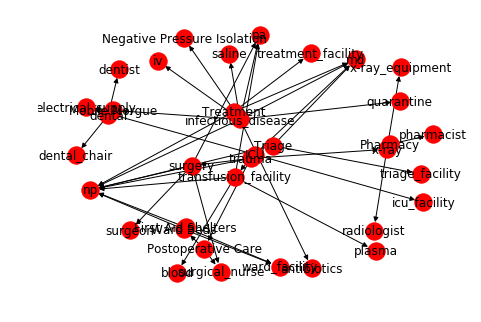

In [95]:
g = net.DiGraph(dependencies)
pos=net.spring_layout(g)
net.draw(g,pos=pos,with_labels=True)

In [96]:
net.degree(g)

DiDegreeView({'x-ray_equipment': 1, 'surgical_nurse': 2, 'triage_facility': 1, 'Ward Beds': 3, 'First Aid Shelters': 2, 'Treatment': 3, 'Mobile Morgue': 2, 'surgery': 5, 'saline': 1, 'ward_facility': 2, 'transfusion_facility': 5, 'radiologist': 1, 'pa': 3, 'trauma': 6, 'np': 8, 'pharmacist': 1, 'infectious_disease': 9, 'Triage': 3, 'treatment_facility': 1, 'dental': 2, 'electrical_supply': 2, 'antibiotics': 1, 'blood': 1, 'surgeon': 1, 'Pharmacy': 1, 'ICU': 2, 'md': 4, 'plasma': 1, 'quarantine': 1, 'dentist': 1, 'Postoperative Care': 3, 'iv': 1, 'Negative Pressure Isolation': 1, 'dental_chair': 1, 'icu_facility': 1, 'x-ray': 3})

In [97]:
def build_dependencies(hospital):
    out={}
    for unit in hospital:
        deps = _dependencies(unit)
        for d,amt in deps.items():
            if d in out:
                out[d]+=amt
            else:
                out[d]=amt
    return out
        
def _dependencies(unit,amt=1):
    out = {}
    if unit not in dependencies:
        out[unit]=out[unit]+amt if unit in out else amt
    else:
        out[unit]=out[unit]+amt if unit in out else amt
        for subunit,amt in dependencies[unit].items():
            out.update(_dependencies(subunit,amt))
    return out

In [100]:
build_dependencies(['infectious_disease','trauma'])

{'Mobile Morgue': 1,
 'Negative Pressure Isolation': 1,
 'Postoperative Care': 1,
 'Ward Beds': 1,
 'antibiotics': 100,
 'blood': 100,
 'electrical_supply': 10,
 'infectious_disease': 1,
 'iv': 100,
 'md': 2,
 'np': 10,
 'pa': 15,
 'plasma': 100,
 'quarantine': 10,
 'radiologist': 1,
 'saline': 100,
 'surgeon': 1,
 'surgery': 1,
 'surgical_nurse': 1,
 'transfusion_facility': 1,
 'trauma': 1,
 'ward_facility': 1,
 'x-ray': 1,
 'x-ray_equipment': 1}

In [114]:
def fitness(hospital, case):
    h_dep = build_dependencies(hospital)
    c_dep = build_dependencies(case)   
    out = 0
    for req,amt in c_dep.items():
        if req not in h_dep: 
            out+=amt
        elif amt > h_dep[req]:
            out+=amt-h_dep[req]
    return out

In [104]:
fitness(['surgery'],['infectious_disease'])

{'np': 5, 'surgery': 1, 'pa': 5, 'surgeon': 1, 'surgical_nurse': 1} {'saline': 100, 'md': 1, 'infectious_disease': 1, 'electrical_supply': 10, 'iv': 100, 'Mobile Morgue': 1, 'antibiotics': 100, 'pa': 10, 'Negative Pressure Isolation': 1, 'np': 5, 'quarantine': 10}


329

In [153]:
def cost(hospital):
    return(100*len(hospital))

def total_utility(hospital,cases):
    return(abs(fitness(hospital,cases)-cost(hospital))-100)

In [154]:
total_utility(['trauma'],['surgery'])

0

In [155]:
def step(hospital):
    h2 = copy(hospital)
    if random() > 0.5 or len(h2)<1:
        random_unit = choice(dependencies.keys())
        h2.append(random_unit)
    else:
        random_unit = choice(hospital)
        h2.remove(random_unit)
    return h2

In [159]:
import pandas as pd
def gradient_descent(hospital,cases):
    data = pd.DataFrame()
    for _ in range(100):
        h2 = step(hospital)
        u1 = abs(total_utility(hospital,cases))
        u2 = abs(total_utility(h2,cases))
        print(hospital,'\n',h2,u1,u2)
        if u2 < u1:
            hospital = h2
            u1=u2
        data = data.append({'h':str(hospital),'u':u1},ignore_index=True)
    return data
        

In [163]:
gradient_descent(['surgery'],['infectious_disease'])

(['surgery'], '\n', [], 129, 239)
(['surgery'], '\n', ['surgery', 'x-ray'], 129, 29)
(['surgery', 'x-ray'], '\n', ['surgery'], 29, 129)
(['surgery', 'x-ray'], '\n', ['surgery', 'x-ray', 'transfusion_facility'], 29, 76)
(['surgery', 'x-ray'], '\n', ['surgery'], 29, 129)
(['surgery', 'x-ray'], '\n', ['surgery', 'x-ray', 'surgery'], 29, 76)
(['surgery', 'x-ray'], '\n', ['surgery', 'x-ray', 'surgery'], 29, 76)
(['surgery', 'x-ray'], '\n', ['surgery', 'x-ray', 'Pharmacy'], 29, 71)
(['surgery', 'x-ray'], '\n', ['surgery', 'x-ray', 'infectious_disease'], 29, 200)
(['surgery', 'x-ray'], '\n', ['surgery'], 29, 129)
(['surgery', 'x-ray'], '\n', ['surgery'], 29, 129)
(['surgery', 'x-ray'], '\n', ['x-ray'], 29, 139)
(['surgery', 'x-ray'], '\n', ['surgery'], 29, 129)
(['surgery', 'x-ray'], '\n', ['surgery', 'x-ray', 'Postoperative Care'], 29, 71)
(['surgery', 'x-ray'], '\n', ['surgery', 'x-ray', 'Postoperative Care'], 29, 71)
(['surgery', 'x-ray'], '\n', ['x-ray'], 29, 139)
(['surgery', 'x-ray'], '

,h,u
0,['surgery'],129.0
1,"['surgery', 'x-ray']",29.0
2,"['surgery', 'x-ray']",29.0
3,"['surgery', 'x-ray']",29.0
4,"['surgery', 'x-ray']",29.0
5,"['surgery', 'x-ray']",29.0
6,"['surgery', 'x-ray']",29.0
7,"['surgery', 'x-ray']",29.0
8,"['surgery', 'x-ray']",29.0
9,"['surgery', 'x-ray']",29.0


In [164]:
#### RESPONSE SURFACE -- 